# CSCI-UA 0473 - Introduction to Machine Learning
## HW 2 - Programming Assignment

## Instructions
For this programming assignment, an image (vector) was chosen and was passed through a weird function to obtain something mysterious (vector). 

You are given the mysterious vector and the weird function used to transform the original image. 

AND, YOUR TASK IS TO FIND THE ORIGINAL IMAGE.

Hint: You will find Autograd helpful.

In [6]:
%matplotlib inline

import matplotlib.pyplot as plot
import matplotlib.cm as cm

from autograd import numpy
from autograd import grad

from scipy import optimize
import scipy

## 1. Given

In [7]:
# The mysterious vector

import pickle    # Library used to save and load values of variables (Technically, it's called Serialization)

shp_original_img = (100, 100)  # Shape of the original image
#Adjusted for python 3 with latin1 encoding
mysterious_image = pickle.load(open('mysterious_image_t.p', 'rb'), encoding="latin1") # mysterious_image is a vector representing the morphed image

In [8]:
# The weird function which transformed the original image

def weird_function(x, n_iter=5):
    h = x    
    filt = numpy.array([-1./3, 1./3, -1./3])
    
    for ii in range(n_iter):
        h_l = numpy.concatenate([numpy.array([0]), h[:-1]])

        h_r = numpy.concatenate([h[1:], numpy.array([0])])

        h = filt[0] * h + filt[-1] * h_l + filt[1] * h_r

        
        if numpy.mod(ii, 2) == 0:
            h = numpy.concatenate([h[h.shape[0]//2:],h[:h.shape[0]//2]])
        
    return h


## 2. Your Solution

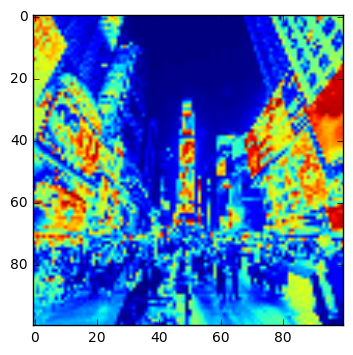

In [14]:
# Your Code

# create a random image by initializing a vector with random numbers
rand_img = numpy.random.rand(10000,)

#define the error of the mean loss between the random image and the mysterious image
def mean_loss_err(img, mysterious_image):
    #define the prediction
    pred = weird_function(img)
    #define the mean of the absole error
    mean_abs_err = numpy.linalg.norm(pred - mysterious_image, 2) 
    return mean_abs_err

# Wrap the mean loss error function
def _wrap(rand_img, mysterious_image):
    return mean_loss_err(rand_img, mysterious_image),grad(mean_loss_err)(rand_img, mysterious_image)

# Train by using scipy optimize minimize
optimized = scipy.optimize.minimize(_wrap, rand_img, (mysterious_image), method='L-BFGS-B', jac=True, tol=0.00000000001)

#display the result
plot.imshow(  numpy.reshape(optimized.x, (100,100))   )